1. Campaign for selling personal loans - Problem Statement : 

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


It is a Binary classification problem where we have to predict potential customers who have higher probability of purchasing the loan. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). 
Binary Classification : In this classification we have to predict either of the two given classes. i.e Customer will accept a personal loan offer or Not. In marketing terms , We call this as cross selling the products to existing customers. 

In [709]:
#Loading Packages

import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 

 # To enable plotting graphs in Jupyter notebook
%matplotlib inline           

import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression 

from sklearn.neighbors import KNeighborsClassifier

#X and y dataframes will broken into training set and test set later on. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# Import accuracy measures and confusion matrix, accurate score packages 

from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score,recall_score

# To hide all the warning messages in the log

import warnings
warnings.filterwarnings('ignore')

In [710]:
# Reading data 

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data

PL_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [711]:
# Quick glance at the sample records 

PL_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [712]:
# Checck the fields in the data frame 

PL_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

We have 13 independent variables and 1 target variable, i.e. Personal Loan in the dataset. 

################################# Here is the Column descriptions######################################


1. ID is Customer ID

2. Age is Customer's age in years

3. Experience is  #years of professional experience

4. Income is Annual income of the customer (USD 1000)

5. ZIPCode is Home Address ZIP code

6. Family is Family size of the customer

7. CCAvg Avg. is spending on credit cards per month (USD 1000)

8. Education is Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9. Mortgage is Value of house mortgage if any. (USD 1000)

10. Personal Loan is Did this customer accept the personal loan offered in the last campaign (1) or Not (0)

11. Securities Account is Does the customer have a securities account with the bank

12. CD Account is Does the customer have a certificate of deposit (CD) account with the bank

13. Online is Does the customer has Online banking facility with the bank or not 

14. CreditCard is Does the customer has a credit card issued by the Bank or not 

In [713]:
# Print data types for each variable 

PL_df.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#We have 2 formats of data types in the dataset i.e int64 and float64.

In [714]:
#Get the shape of the dataset 

def dataframe_shape(PL_df):
    print("The dataframe has %d rows" %PL_df.shape[0])
    print("The dataframe has %d columns" %PL_df.shape[1])

dataframe_shape(PL_df)

The dataframe has 5000 rows
The dataframe has 14 columns


Inference: We have 5000 rows and 14 columns in the dataset.

In [715]:
#Check for the missing values in the data frame

PL_df.apply(lambda x : sum(x.isnull()))


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Inference : # No columns have null data in the data file

In [716]:
#Summary statistics 

PL_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Inference from summary statistics:

Age and Experience columns mean and median is as almost same. Both fields follow almost normal distribution. 

There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience.

Income and Mortage amount fields mean is greater than the median, it shows the data right skewed.

CCavg is also positively skewed. Average credit card spend is 0 to 10k but data shows 50% of the customers are spending less than 1.5k.

In [717]:
#Look for unique data in each field

PL_df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [718]:
# Take the absolute value of experience column to correct the neagtive values.

PL_df["Experience"] = PL_df["Experience"].apply(abs)

In [719]:
#Summary statistics to make sure the negative values in  experience column are removed

PL_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Inference: 
    
     Now it shows the negative values are removed and also mean is almost equals to median so,the 
process we followed to impute the neagative values with absolute has worked.

In [720]:
# Produce Target column distribution

PL_df.groupby(["Personal Loan"]).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Inference :
    
    Personal Loan Class distribution among 0 and 1 is almost 9:1. The model will better predict 0's compared to 1's


Drop the first columns from the data frame. This is ID column not used in the modelling.

In [565]:
# The first column is id column which is customer id and nothing to do with the model attriibutes. So drop it.

PL_df = PL_df.drop(labels = "ID", axis = 1)


In [566]:
# Check the shape of the data frame to make sure ID is dropped.

PL_df.shape


(5000, 13)

Personal Loan
0    90.4
1     9.6
Name: Personal Loan, dtype: float64


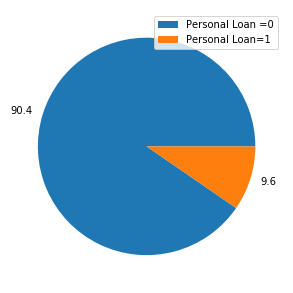

In [657]:
# 3. Get the target column distribution.  

# Plot a pie chart to see the perccentage of Customers accepeted Personal Loans =1 and
# Not accepted Personal Loans =0 in the data 

percent = (PL_df.groupby("Personal Loan")["Personal Loan"].count()/len(PL_df.index))*100
print(percent)
labels=['Personal Loan =0','Personal Loan=1']
plt.figure(figsize=(5,5))
plt.pie(percent, labels=(percent.round(2)))

plt.legend(labels,loc= "best")

Only 9.6% of the customers in the data file has Personal Loan compared to 90.4% of customers without the Personal loan(0).
This clearly shows we do not have enough data for the model to learn more about customers accpeted the personal loans.
Model will learn and predict customers without personal loans more accurately compared to customers with personal loans
Real time scenario, we need to request the bank to include equal proportions of the data for the each class in the 
target column. In this case, we will be exploring other options like Upsampling the minority data to feed the model with 
equal proportions of data.

In [658]:
# 2. Discriptive Statistics of customers accepted Personal Loans

PL_df_1= PL_df.loc[PL_df['Personal Loan']==1]

PL_df_1.mean()

ID                     2390.650000
Age                      45.066667
Experience               19.843750
Income                  144.745833
ZIP Code              93153.202083
Family                    2.612500
CCAvg                     3.905354
Education                 2.233333
Mortgage                100.845833
Personal Loan             1.000000
Securities Account        0.125000
CD Account                0.291667
Online                    0.606250
CreditCard                0.297917
dtype: float64

In [569]:
#Discriptive Statistics of customers not accepted Personal Loans

PL_df_0= PL_df.loc[PL_df['Personal Loan']==0]

PL_df_0.mean()

Age                      45.367257
Experience               20.165487
Income                   66.237389
ZIP Code              93152.428761
Family                    2.373451
CCAvg                     1.729009
Education                 1.843584
Mortgage                 51.789381
Personal Loan             0.000000
Securities Account        0.102212
CD Account                0.035841
Online                    0.595796
CreditCard                0.293584
dtype: float64

Inference :

Above Discriptive statistics clearly shows that customer accepted personal loans are having higher -

1. Average income 144K compared to 66K of customers without the personal loan

2. CCAvg 3.9k compared to 1.7k of customers without the personal loan. Bank may need to target customers with higher CC 
3. spending i.e >=3.9k,
4. Educating level is more 2.2 for customers with personal loan compared to 1.8 of customers without the personal loan and 
5. mortgage balance is 100K for customers with personal loan compared to 51k compared to customers without accepting the Personal Loan

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <a list of 10 Patch objects>)

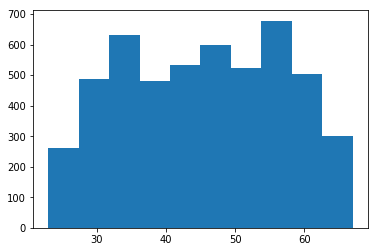

In [570]:
#2. Check the distribution of each attribute and document findings 

plt.hist(PL_df['Age'])



Inference: Age of the customers is almost normally distrubuted.

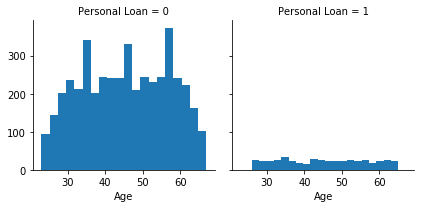

In [571]:
# Bivariate Analsyis of Target variable Vs Age 

Age = sns.FacetGrid(PL_df, col='Personal Loan')
Age.map(plt.hist,'Age', bins=20)



Inference :
    
    There is no significant difference in the Age of the customers accepted Personal and Not accpeted Personal
Loan expect slight pickup around 35yrs and 45 yrs.

(array([519., 505., 483., 615., 533., 541., 647., 500., 461., 196.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

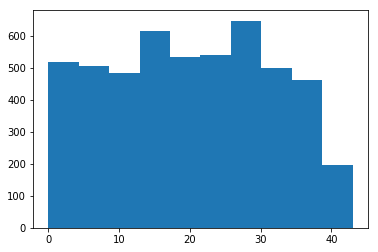

In [572]:
# Check the distribution of Experience column

plt.hist(PL_df['Experience'])


Inference :
    
    Histogram Above shows the work experince of the customer is ranging from 0 to 43 years.There is no significant 
trend in the experince of the customers. Update required *****

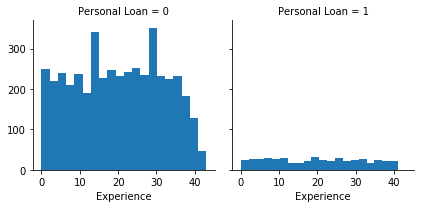

In [573]:
# Bivariate Analsyis of Target variable Vs Experience

Experience = sns.FacetGrid(PL_df, col='Personal Loan')
Experience.map(plt.hist,'Experience', bins=20)

Inference:

There is not much significant difference in the Experince of the customers accepted Personal and Not accpeted Personal Loan

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

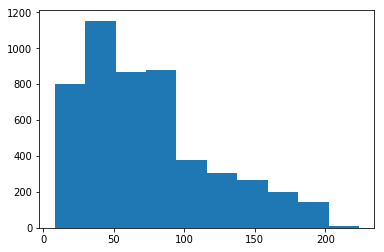

In [574]:
# Check the distribution of Income colum

plt.hist(PL_df['Income'])


Inference:
    
Histogram above shows the income of the customers is right skewed.i.e Mean income of the customers is more than the 
Median income.Most of the customers are having income less than 100k.

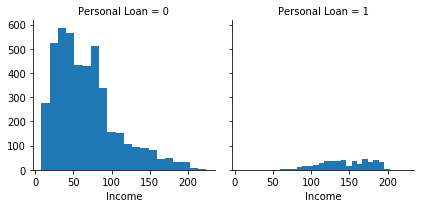

In [575]:
# Bivariate Analsyis of Target variable Vs Income

income = sns.FacetGrid(PL_df, col='Personal Loan')
income.map(plt.hist,'Income', bins=20)

Inference:

Above graph clearly shows that the customers accepted the personal loan is having higher income i.e >100k compared to the customers without the personal loan accpeted. Technical - So, It looks like income is very important feature in predicting whether the customer will accept the personal loan or not.

(array([1472.,    0.,    0., 1296.,    0.,    0., 1010.,    0.,    0.,
        1222.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

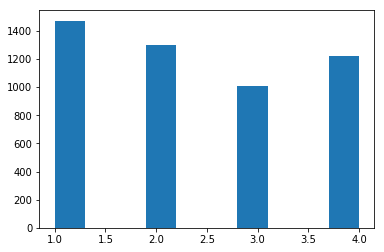

In [576]:
# Check the distribution of Family colum

plt.hist(PL_df['Family'])

Inference:

There is not much signfince difference in the number of people in the family. 55% of the customers are having 1 or 2 in 
the family and remaining 45% are having more than 2 in the family.

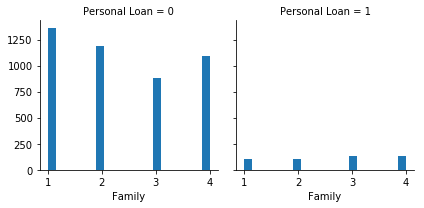

In [577]:
# Bivariate Analsyis of Target variable Vs Family

family = sns.FacetGrid(PL_df, col='Personal Loan')

family.map(plt.hist,'Family', bins=20)

Inference:

There is no clear indication of number of people in the family affecting the outcome of Target variable in the data. As the number of people in the family increases then chances of taking personal loan slightly increases.

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

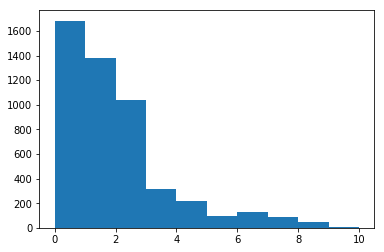

In [578]:
# Check the distribution of CCAVg colum

plt.hist(PL_df['CCAvg'])

Inference:
    
    Histogram above shows the Credit card average balance of the customers is right skewed.i.e Mean CCAvg balance of the 
customers is more than the Median income. Most of the customers are having CCAvg balance less than < 3k.

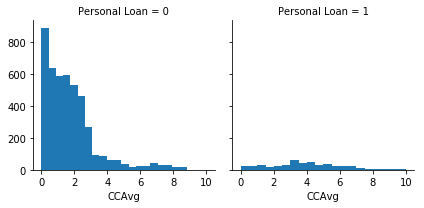

In [580]:
# Bivariate Analsyis of Target variable Vs Credit card Average balance

CCAvg = sns.FacetGrid(PL_df, col='Personal Loan')

CCAvg.map(plt.hist,'CCAvg', bins=20)

Inference:

Majority of the customers accepted the personal loan offer are having CCAvg balance between 1.8k to 6.5k. 
Customers who do not accpeted the personal offer having credit card average balance below 2k. 
Mean CCAvg balances are 3.9k Vs 1.7k .

(array([2096.,    0.,    0.,    0.,    0., 1403.,    0.,    0.,    0.,
        1501.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

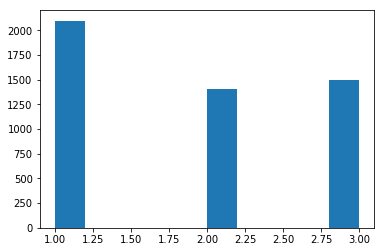

In [581]:
# Check the distribution of Education colum

plt.hist(PL_df['Education'])

Inference: 

Majority of the cusotmers are having educational level 1. this may be the reason for low income for the majority of the 
customers. 

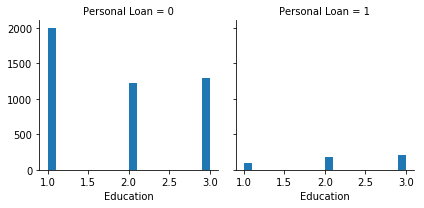

In [582]:
# Bivariate Analsyis of Target variable Vs Education

Education = sns.FacetGrid(PL_df, col='Personal Loan')
Education.map(plt.hist,'Education', bins=20)

Inference :

Above graphs clearly shows that customers with higher education levels 2 and 3 are accepting the personal loan offers more 
compared to the education level 1. From the data,It shows Bank didnt offer Personal loans to customers with education level 1 in the past campaign. These are high risk customers.

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

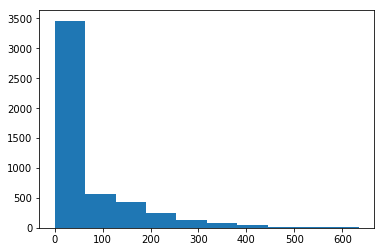

In [583]:
# Check the distribution of Mortgage colum

plt.hist(PL_df['Mortgage'])

Inference:

Graph above clearly shows that the  majority of the customers are having mortage loan balances of less than 100k.

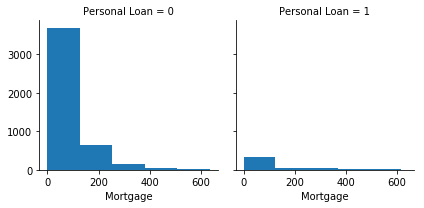

In [584]:
# Bivariate Analsyis of Target variable Vs Mortgage

Mortgage = sns.FacetGrid(PL_df, col='Personal Loan')
Mortgage.map(plt.hist,'Mortgage', bins=5)


Inference:

Most of the customers having personal loan product has mean mortgage balance of 100K comapared to the 51k of the customers without accepting the Personal Loan.  

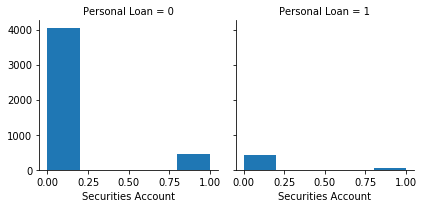

In [585]:
# Bivariate Analsyis of Target variable Vs Securities Account

Securities = sns.FacetGrid(PL_df, col='Personal Loan')
Securities.map(plt.hist,'Securities Account', bins=5)


Inference: 

Majority of customers who accpeted a personal does not have have securities account

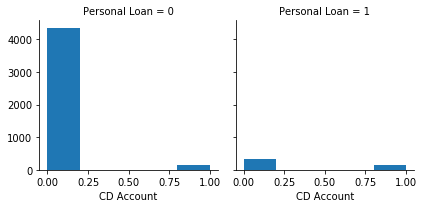

In [586]:
# Bivariate Analsyis of Target variable Vs CD Account

CD = sns.FacetGrid(PL_df, col='Personal Loan')

CD.map(plt.hist,'CD Account', bins=5)

Inference: Customers who has accepted personal loan, majoirty of them doesn't have a CD account

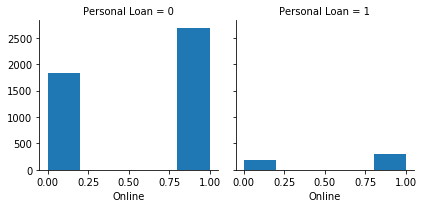

In [659]:
# Bivariate Analsyis of Target variable Vs Online

Online = sns.FacetGrid(PL_df, col='Personal Loan')

Online.map(plt.hist,'Online', bins=5)

Inference: 

Most of the customers with Personal loan are having online banking activated

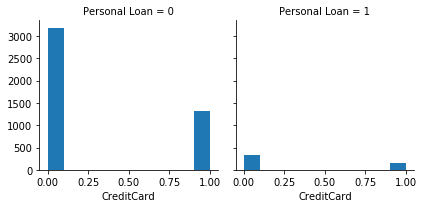

In [588]:
# Bivariate Analsyis of Target variable Vs Credit Card Account

CreditCard = sns.FacetGrid(PL_df, col='Personal Loan')

CreditCard.map(plt.hist,'CreditCard', bins=10)


Inference: 

Majority of the customers accepted Personal Loan does not have a credit card with the bank.

In [660]:
#Creating grouping of Zip codes to convert it to categorical variable to see the 
# importance of it on the target variable - Personal Loan 

bins = pd.Series([])
for i in PL_df.index:
    if (PL_df.loc[i:i,]["ZIP Code"] <= 91007).bool(): bins = bins.append(pd.Series(["9307-91007"]))
    elif (PL_df.loc[i:i,]["ZIP Code"] <= 92007).bool(): bins = bins.append(pd.Series(["91008-92007"]))
    elif (PL_df.loc[i:i,]["ZIP Code"] <= 94807).bool(): bins = bins.append(pd.Series(["92008-94807"]))
    else: bins = bins.append(pd.Series([">94808"]))
bins.reset_index(drop=True, inplace=True)
PL_df["Zip_grps"] = bins
PL_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Zip_grps
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,91008-92007
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,9307-91007
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,92008-94807
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,92008-94807
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,91008-92007


In [661]:
# Converting categorical Zip_grps column to Dummay variables to see the significance 

dummies = pd.get_dummies(PL_df['Zip_grps'])

dummies.head(5)

,91008-92007,92008-94807,9307-91007,>94808
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [662]:
# Concatenate dummy fields to the original data frame 

PL_df=pd.concat([PL_df,dummies], axis =1 ) ## added encoded categorical columns

PL_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Zip_grps,91008-92007,92008-94807,9307-91007,>94808
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,91008-92007,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,9307-91007,0,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,92008-94807,0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,92008-94807,0,1,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,91008-92007,1,0,0,0


In [663]:
# Drop the ZIP code and Zip_grps fields. They no longer required.

PL_df.drop(['ZIP Code','Zip_grps'], axis=1,inplace = True)

PL_df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,91008-92007,92008-94807,9307-91007,>94808
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,1,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,0,1,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,1,0,0,0


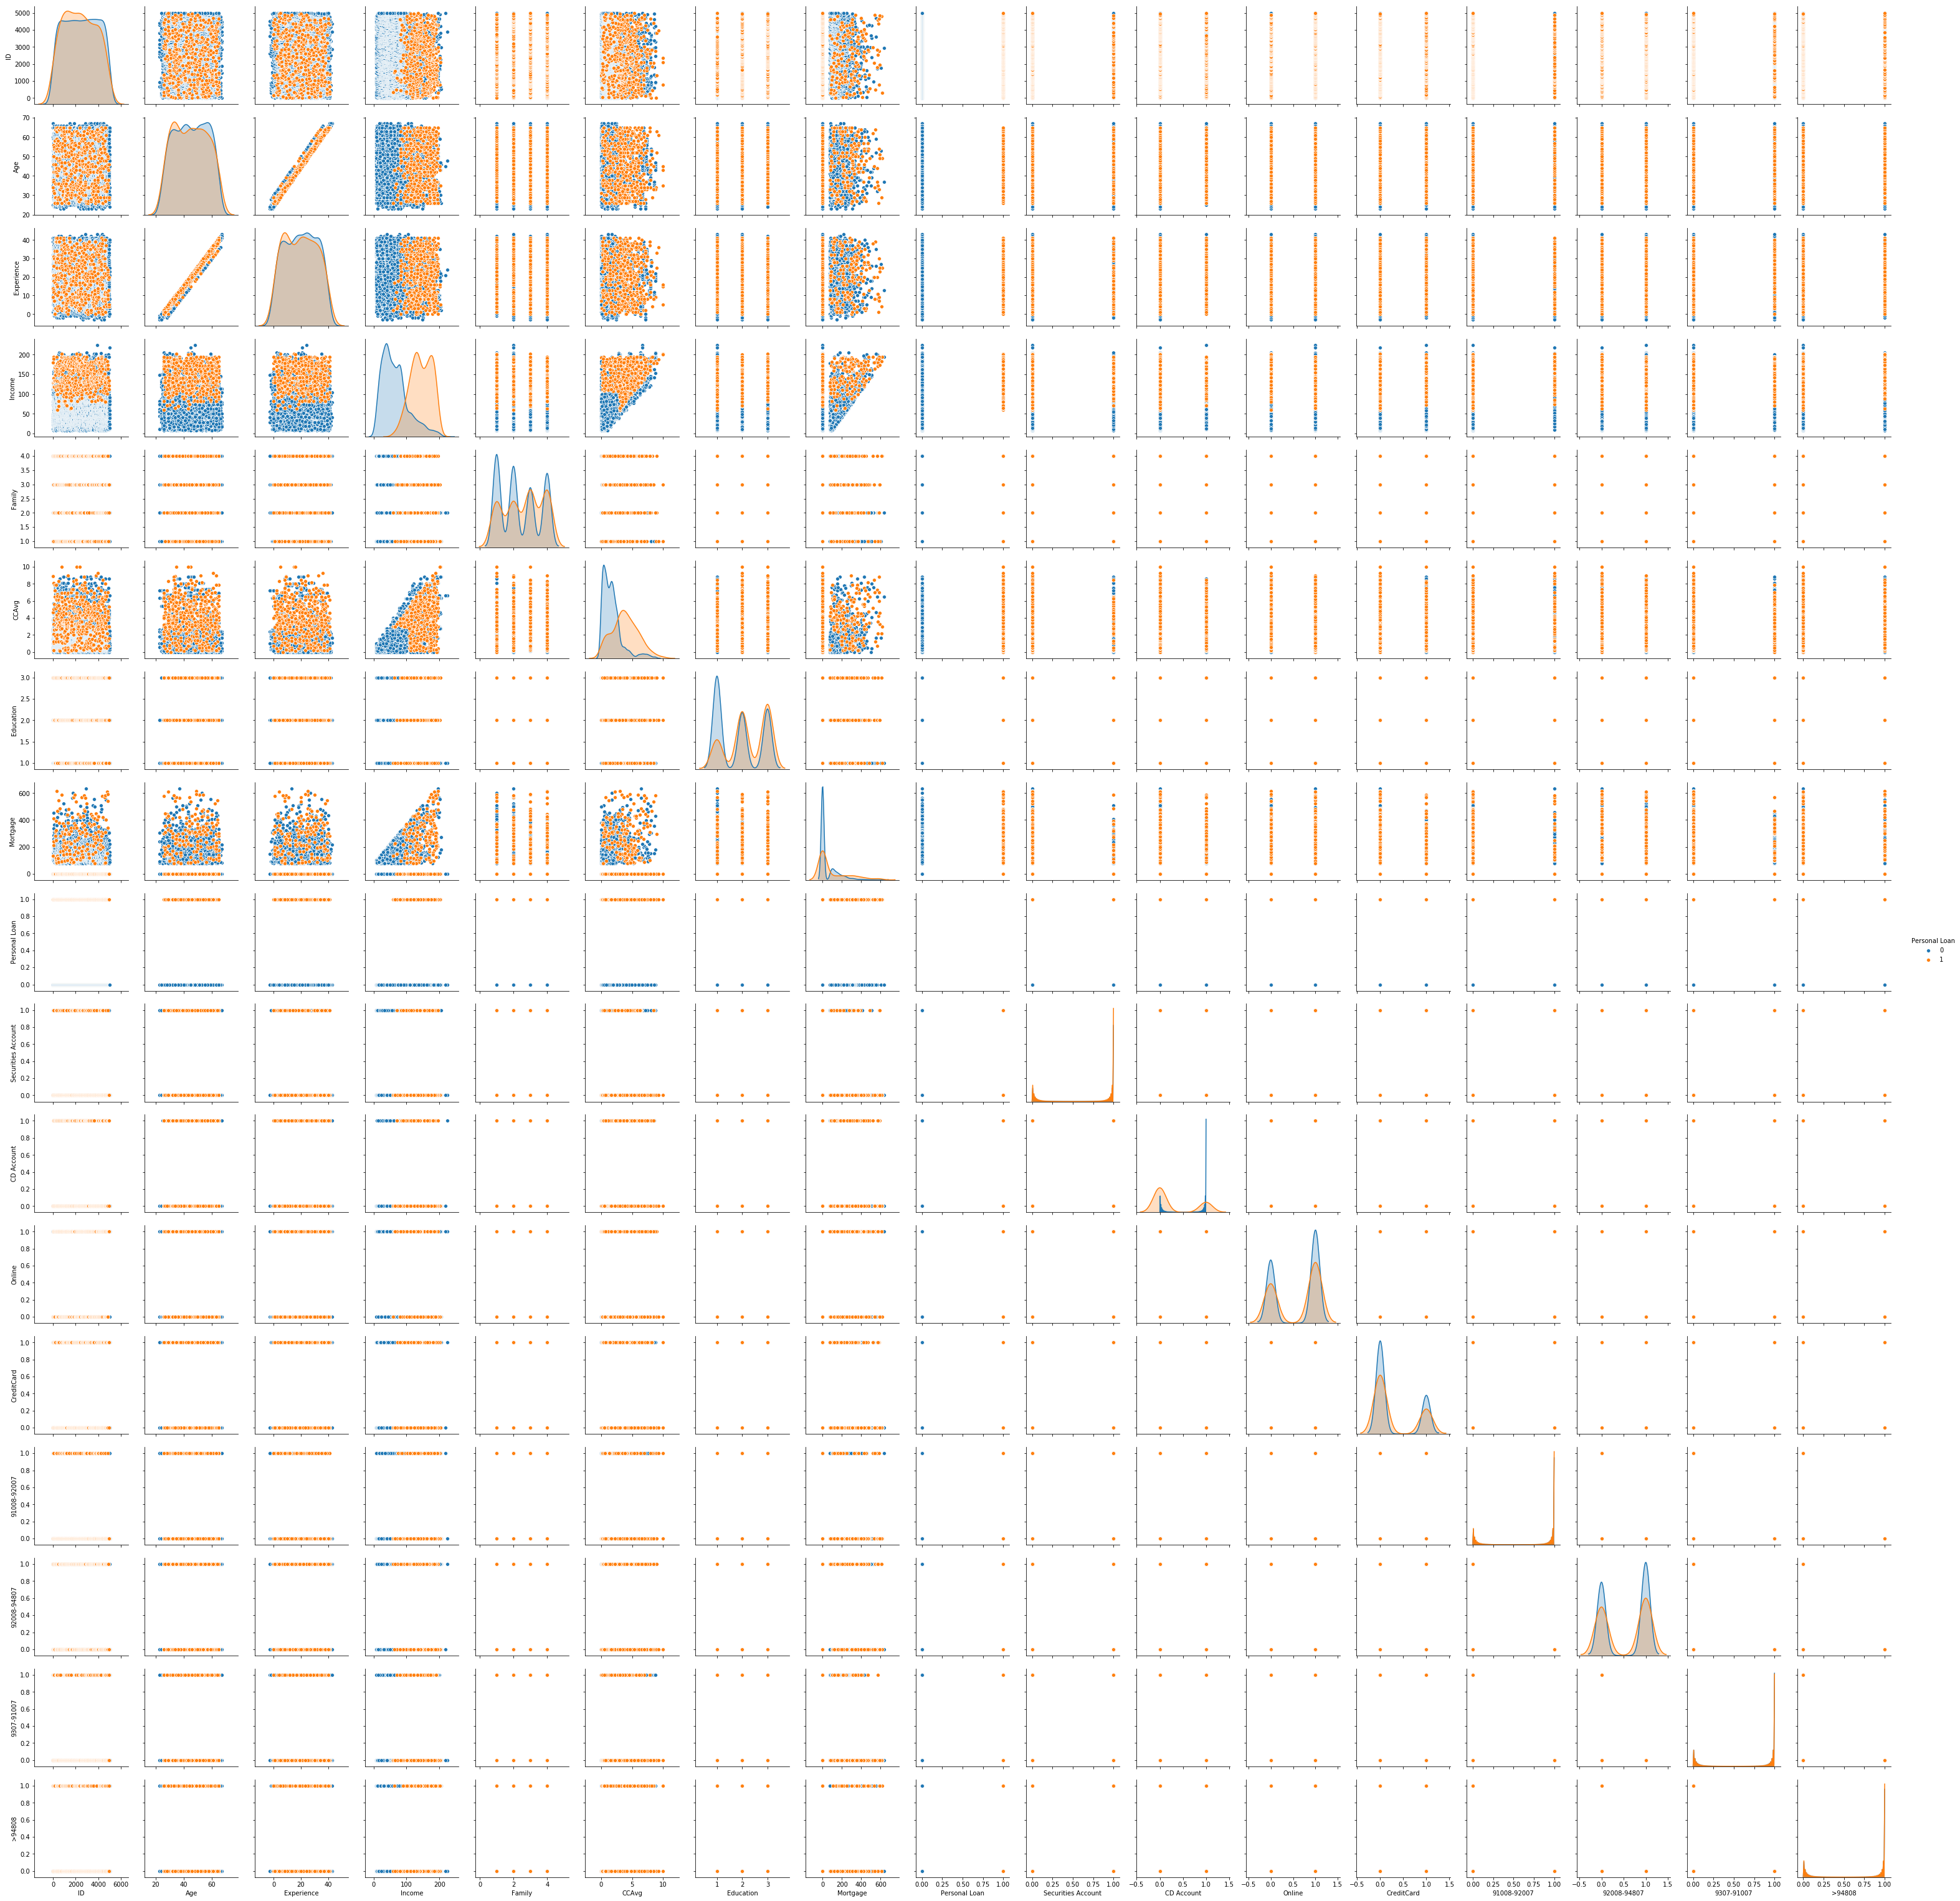

In [664]:
# Create a pairplot to see the distribution of the target variable Vs independent variables and distribution among 
# independant variables itself

sns.pairplot(PL_df,hue='Personal Loan')

Inference : 

Pairplot doesn't showing clear difference in the attribute values for customers with and without the Personal Loan. 

1. It looks like age and Experience are correlated i.e work experience is increasing with increase in age. But no clear difference in age and experience of the customers accepted the personal loans in the previous campaign.

2. Customers with higher income accpeted personal loans in the previous campaign compared lower income customers.

3. Looks like families with more than 2 people are having higher chances of accepting the Personal Loan

4. CCavg is playing significant role in customers accepting the personal loan. Customers with higher credit card average balance are accepting personal loans more compared to lower CCavg balance customers.

5. Customers with higher mortage balances has accepted the personal loans more in the previous campaign.



In [594]:
#Calculate correlation coefficients

corr=PL_df.corr()

corr


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,91008-92007,92008-94807,9307-91007,>94808
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.007962,0.000300,0.014432,-0.019853
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851,0.008037,0.000379,0.014469,-0.020047
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,0.021515,-0.015865,0.019414,-0.014751
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.025350,0.016786,-0.015457,0.013145
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,0.019488,-0.006595,-0.003519,-0.004310
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014,0.013954,0.011878,-0.011595,-0.016116
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,0.010360,-0.012344,-0.007903,0.014414
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.007428,-0.010454,-0.001056,0.008235
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.002678,-0.000088,0.000857,0.001526
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,-0.008750,0.004403,-0.012299,0.012575


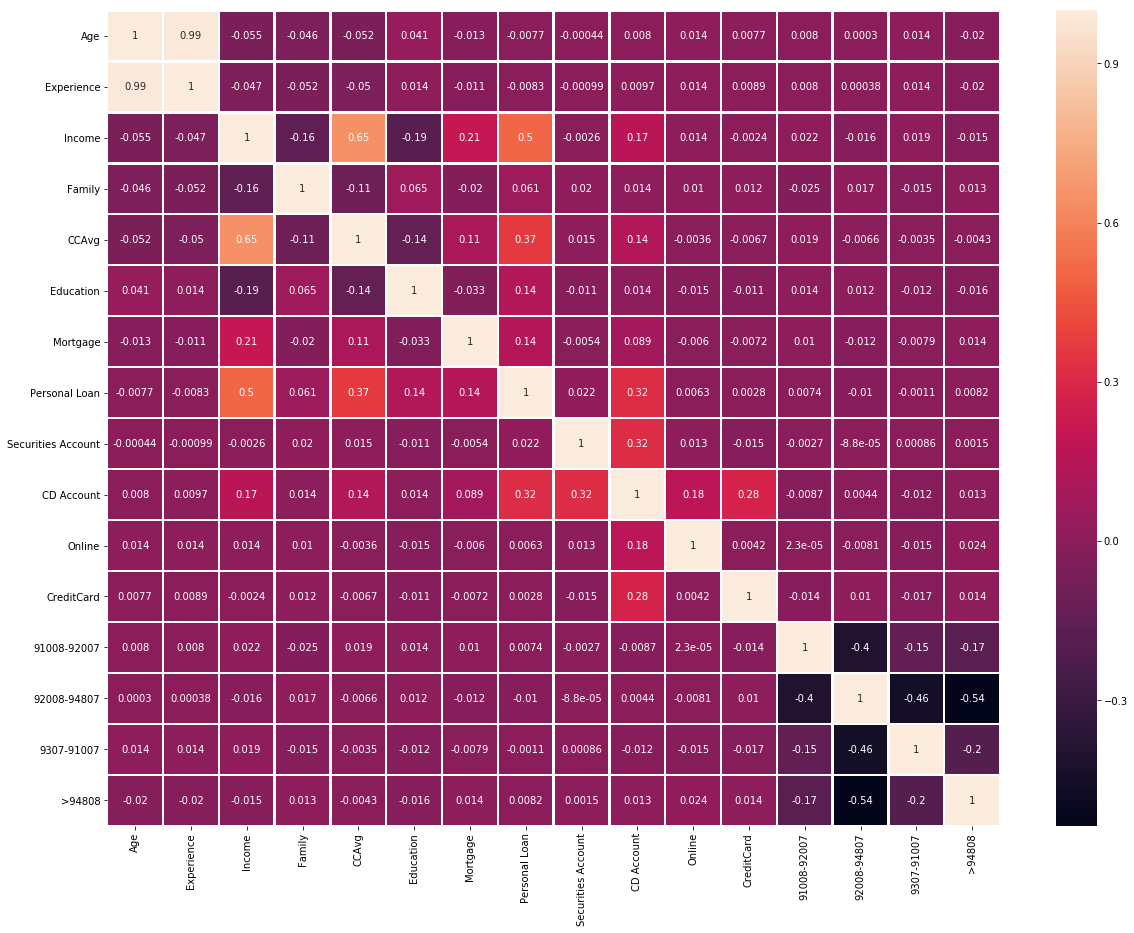

In [665]:
#Plot the correlation coefficients using the heatmap

plt.subplots(figsize=(20,15))

sns.heatmap(corr,annot=True,linewidths=1.5)

Inference :

Looks like lot of features in the data are correlated with the target variable Personal Loan

i.e These attributes are contributing to the reason being customers accepting the personal loans.

Income and Personal loan are positively correlated i.e 0.5
Education and Personal Loan are positively correlated 0.14
CCAvg and Personal Loan are positively correlated i.e 0.37
Mortgage and Personal are positively correlated i.e 0.14 
CDaccount and Personal loan are positively correlated i.e 0.32


Age and Experience are highly correlated i.e 0.99. Multicollinioarity exists here. So, we need to drop 
one column during the model buidling stage.

Income and family are negatively correlated i.e -0.16 
Income and Education are negatively correlated i.e -0.19
Income and Mortgage are positively correlated i.e 0.21


Family and CCavg are negatively correlated i.e -0.11

CCAvg and Education are negatively correlated -0.14
CCAvg and Mortgage are positively correlated i.e 0.11
CCAvg and Income are positively correlated i.e 0.65

CCAvg and CDAccount are positively correlated i.e 0.14


CDaccount and Income are positively correlated i.e 0.17

CDaccount and Securities Account are positively correlated i.e 0.32
CDAccount and Credit Card are positively correlated i.e 0.28
CDAccount and Online are positively correlated i.e 0.18

There are not much significant correlation between Personal Loan and Zip code dummary columns.
So, we can drop the column from the modeling building.


In [666]:
# Create a copy of the PL_df data frame before dropping the columns so, that we no need to run the script from
# the beginning.

PL_df1 = PL_df.copy()

PL_df1.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,91008-92007,92008-94807,9307-91007,>94808
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,1,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,0,1,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,1,0,0,0


In [667]:
# Age and Experience columns are highly Correllated i.e 0.99. This is a multicolliniearity issue. We need drop one 
# independent column from the model building.We will remove the Experience column. Also correlation matrix shows
#Exeprience will have an impact on the customers taking the personal loans. So, we will drop both the columns

PL_df1.drop(['Experience','Age'], axis=1, inplace = True)
PL_df1.head()

,ID,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,91008-92007,92008-94807,9307-91007,>94808
0,1,49,4,1.6,1,0,0,1,0,0,0,1,0,0,0
1,2,34,3,1.5,1,0,0,1,0,0,0,0,0,1,0
2,3,11,1,1.0,1,0,0,0,0,0,0,0,1,0,0
3,4,100,1,2.7,2,0,0,0,0,0,0,0,1,0,0
4,5,45,4,1.0,2,0,0,0,0,0,1,1,0,0,0


In [668]:
 # Drop the dummy Zip code columns from the data frame as they are not significant for model building
    
PL_df1.drop(['9307-91007','91008-92007','92008-94807','>94808'], axis=1, inplace = True)

PL_df1.head()

,ID,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,2,34,3,1.5,1,0,0,1,0,0,0
2,3,11,1,1.0,1,0,0,0,0,0,0
3,4,100,1,2.7,2,0,0,0,0,0,0
4,5,45,4,1.0,2,0,0,0,0,0,1


In [672]:
# 4. Split the data into training and test set in the ratio of 70:30 respectively 

# Capture all the independent variables and store it in X 

X = PL_df1.drop(['Personal Loan'], axis=1)

# Capture the class values from the 'Personal Loan' column into y 

y = PL_df1["Personal Loan"]

# Split the data into traininng and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [673]:
# Logistic Regression Model 

model = LogisticRegression() 
classifier =LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1,
max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

# Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to 
# increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger
# regularization

y_predict = model.predict(X_test)

In [674]:
# Print the accuracy score, confusion report, Classification report with precision, recall and f1 score, ROC AUC metrics

predProb = model.predict_proba(X_test.values)

print("**"*40)

print('The accuracy of the Logistic is',metrics.accuracy_score(y_predict,y_test))

print("__"*40)

print("confusion_matrix :\n",confusion_matrix(y_test,y_predict))

print("__"*40)

print("\nclassification_report :\n",classification_report(y_test,y_predict))

print("__"*40)

print('Recall Score',recall_score(y_test,y_predict))

print('ROC AUC :', roc_auc_score(y_test, predProb[:,1]))

print('Accuracy :',accuracy_score(y_test, y_predict))

accuracies_logistic= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10) 

accuracies_logistic_std=accuracies_logistic.std()*100

print("Standard Deviation - Accuracy:Logistic Regression =",accuracies_logistic_std)

print("**"*40)

********************************************************************************
The accuracy of the Logistic is 0.9426666666666667
________________________________________________________________________________
confusion_matrix :
 [[1337   14]
 [  72   77]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.52      0.64       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.90      0.75      0.81      1500
weighted avg       0.94      0.94      0.94      1500

________________________________________________________________________________
Recall Score 0.5167785234899329
ROC AUC : 0.9549525829735865
Accuracy : 0.9426666666666667
Standard Deviation - Accuracy:Logistic Regression = 0.6471684321949602
***************************************************************

Inference :

Logistic Regression model accuracy is 94.2% i.e Overall model is able to predict True positives and True Negatives with 94.2%  accuracy.It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall:

Actually Model is actually working good for customers without the Personal Loan product i.e 99% of the times model 
predicted customers without the personal loan product as personal loan=0. i.e 1337 customers out of 1351.

Only for 52% of the cases model was able to predict customers with Personal loan product as personal i.e 77 customers 
out of 149. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 95% for the customers without the personal loan product i.e 1337 out of 
1409 customers.

Precision is only 85% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 87% of the times customers labeled as cusomers with personal loan is acutally true
i.e 77 out of 91.

Model is not working good for customers with Personal Loan=1 i.e its predicted only 52% of the customers with personal loan as personal but it's predecting the customers withhout personal loan 99% of the time.


                  ****************************Naive Bayes Model************************

In [675]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.model_selection import cross_val_score 

accuracies_nb= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_nb_mean=accuracies_nb.mean()*100
print("Mean Accuracy:Naive Bayes=",accuracies_nb_mean)

accuracies_nb_std=accuracies_nb.std()*100
print("Standard Deviation:Naive Bayes=",accuracies_nb_std)

mean_roc_auc_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, scoring="roc_auc", cv = 10).mean()
std_roc_auc_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, scoring="roc_auc", cv = 10).std()

print("ROC AUC Score:Naive Bayes=",mean_roc_auc_score)


[[1233  118]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.42      0.57      0.48       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

Mean Accuracy:Naive Bayes= 89.17214717787785
Standard Deviation:Naive Bayes= 1.4151283518305242
ROC AUC Score:Naive Bayes= 0.9325509321827419


Inference :
    
    Naive Bayes model accuracy is 88.1% i.e Overall model is able to predict True positives and True Negatives with 88.1% 
    accuracy.It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall: Actually Model is actually working good for customers without the Personal Loan product i.e 91% of the times model 
predicted customers without the personal loan product as personal loan=0. i.e 1233 customers out of 1351.

Only for 57% of the cases model was able to predict customers with Personal loan product as personal i.e 85 customers 
out of 149. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 95% for the customers without the personal loan product i.e 1233 out of 
1297 customers.

Precision is only 42% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 42% of the times customers labeled as cusomers with personal loan is acutally true
i.e 85 out of 203.

Overall F1 score is 89%. We noramlly expect 70-80% for the banking industry problems.

Model is not working good for customers with Personal Loan=1 but it's predecting the customers without personal loan
95% of the time.

In [ ]:
*************************************K Nearest Neighbour algorithm*******************************************************

In [681]:
# loading libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)

knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model

knn.fit(X_train, y_train)

# predict the response

y_pred = knn.predict(X_test)

# evaluate accuracy

print('K-Neighbors = 3:',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('K-Neighbors = 5:',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('K-Neighbors = 7:',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('K-Neighbors = 9:',accuracy_score(y_test, y_pred))

K-Neighbors = 3: 0.8846666666666667
K-Neighbors = 5: 0.89
K-Neighbors = 7: 0.8993333333333333
K-Neighbors = 9: 0.9046666666666666


Inference :

    K-Neighbors 9 is giving maximum accuracy percentage ~90% using the KNN model. In the next steps we will look at 
misclassfication error rate for each value and determine the optimal K-value with lowest error rate.

********Cross Validation*****

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours 
from the above list using the Mis classification error
Hint:
Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and 
find the model with lowest MSE

In [685]:
# Creating odd list of K for KNN

myList = list(range(1,20))

# subsetting just the odd ones

neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [686]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


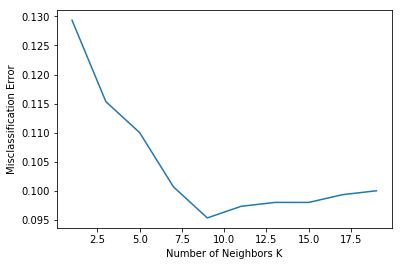

In [687]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Inference - Above graph shows that k= 9 is the optimal value with lowest misclassification error. 
So, we will go ahead with building the K nearest neighbour model with K = 7

In [688]:
# K Nearest Neighbour algorithm

NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )

NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')

In [689]:
# For every test data point, predict it's label based on 7 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8953333333333333

In [690]:
# Print the accuracy score, confusion report, Classification report with precision, recall and f1 score, ROC AUC metrics

predProb = model.predict_proba(X_test.values)

print("**"*40)
print('The accuracy of the KNN is',metrics.accuracy_score(y_predict,y_test))
print("__"*40)
print("KNN -confusion_matrix :\n",confusion_matrix(y_test,y_predict))
print("__"*40)
print("\n KNN-classification_report :\n",classification_report(y_test,y_predict))
print("__"*40)
print('KNN-Recall Score',recall_score(y_test,y_predict))
print('KNN-ROC AUC :', roc_auc_score(y_test, predProb[:,1]))
print('KNN-Accuracy :',accuracy_score(y_test, y_predict))
accuracies_knn= cross_val_score(estimator = NNH, X = X_train, y = y_train, cv = 10) 
accuracies_knn_std=accuracies_knn.std()*100
print("Standard Deviation-KNN=",accuracies_knn_std)

print("**"*40)



********************************************************************************
The accuracy of the KNN is 0.8953333333333333
________________________________________________________________________________
KNN -confusion_matrix :
 [[1318   33]
 [ 124   25]]
________________________________________________________________________________

 KNN-classification_report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1351
           1       0.43      0.17      0.24       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.67      0.57      0.59      1500
weighted avg       0.87      0.90      0.87      1500

________________________________________________________________________________
KNN-Recall Score 0.16778523489932887
KNN-ROC AUC : 0.9549525829735865
KNN-Accuracy : 0.8953333333333333
Standard Deviation-KNN= 0.9964054766944003
*************************************************************************

Inference :
    
    KNN model accuracy is still 89.5% i.e Overall model is able to predict True positives and True Negatives with 89.5% accuracy.
    
It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall: Actually Model is actually working good for customers without the Personal Loan product i.e 98% of the times model 
predicted customers without the personal loan product as personal loan=0. 

Only for 17% of the cases model was able to predict customers with Personal loan product as personal i.e 25 customers 
out of 149. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 94% for the customers without the personal loan product i.e 1318 out of 
1442 customers.

Precision is only 43% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 65% of the times customers labeled as cusomers with personal loan is acutally true
i.e 25 out of 58.
    

**************Upsamplaing miniority data

In [691]:
# Print Frequency distribution of the Target variable 

print(PL_df1['Personal Loan'].value_counts())

#Rename the Personal Loan because the filter query below is not reconginizing the column

PL_df1=PL_df1.rename(columns={"Personal Loan": "Personal_Loan"})
PL_df1.head()

0    4520
1     480
Name: Personal Loan, dtype: int64


,ID,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,2,34,3,1.5,1,0,0,1,0,0,0
2,3,11,1,1.0,1,0,0,0,0,0,0
3,4,100,1,2.7,2,0,0,0,0,0,0
4,5,45,4,1.0,2,0,0,0,0,0,1


In [692]:
# Upsampling the miniority data 

from sklearn.utils import resample

PL_df1_majority=PL_df1[PL_df1.Personal_Loan == 0]       # All rows where Personal Loan==0
PL_df1_minority=PL_df1[PL_df1.Personal_Loan == 1] # All rows wherePersonal Loan==1

PL_df1_minority_upsampled=resample(PL_df1_minority,replace=True,n_samples=4520)
PL_df1_upsampled=pd.concat([PL_df1_minority_upsampled,PL_df1_majority])

PL_df1_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9040 entries, 3508 to 4999
Data columns (total 11 columns):
ID                    9040 non-null int64
Income                9040 non-null int64
Family                9040 non-null int64
CCAvg                 9040 non-null float64
Education             9040 non-null int64
Mortgage              9040 non-null int64
Personal_Loan         9040 non-null int64
Securities Account    9040 non-null int64
CD Account            9040 non-null int64
Online                9040 non-null int64
CreditCard            9040 non-null int64
dtypes: float64(1), int64(10)
memory usage: 847.5 KB


************Split the Upsampled into Train and test sets 

In [693]:
X_upsampled = PL_df1_upsampled.drop('Personal_Loan',1) ## This is the dependent variable.Drop it and keep only independent

y_upsampled =PL_df1_upsampled['Personal_Loan'] ## Keep only independent variable 

X = PL_df1.drop('Personal_Loan',1) # Keep only independent variables in this data frame 
y= PL_df1['Personal_Loan']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

X_train_upsampled, X_test_upsampled, y_train_upsampled,y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size = 0.3,random_state = 1)


############# Logistic Regression Model with UpSampled data ################# 

In [695]:
# Logistic Regression Model 

model = LogisticRegression() 
classifier = LogisticRegression() 
model.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1,
max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

# Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to 
# increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger
# regularization

y_predict_upsampled = model.predict(X_test_upsampled)

In [696]:
# Print the accuracy score, confusion report, Classification report with precision, recall and f1 score, ROC AUC metrics

predProb = model.predict_proba(X_test_upsampled.values)

print("**"*40)
print('The accuracy of the Logistic is',metrics.accuracy_score(y_predict_upsampled,y_test_upsampled))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test_upsampled,y_predict_upsampled))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test_upsampled,y_predict_upsampled))
print("__"*40)
print('Recall Score',recall_score(y_test_upsampled,y_predict_upsampled))
print('ROC AUC :', roc_auc_score(y_test_upsampled, predProb[:,1]))
print('Accuracy :',accuracy_score(y_test_upsampled, y_predict_upsampled))
accuracies_logistic= cross_val_score(estimator = classifier, X = X_train_upsampled, y = y_train_upsampled, cv =10) 
accuracies_logistic_std=accuracies_logistic.std()*100
print("Standard Deviation - Accuracy:Logistic Regression =",accuracies_logistic_std)
print("**"*40)

********************************************************************************
The accuracy of the Logistic is 0.9052359882005899
________________________________________________________________________________
confusion_matrix :
 [[1220  130]
 [ 127 1235]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1350
           1       0.90      0.91      0.91      1362

   micro avg       0.91      0.91      0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712

________________________________________________________________________________
Recall Score 0.906754772393539
ROC AUC : 0.9675526186979931
Accuracy : 0.9052359882005899
Standard Deviation - Accuracy:Logistic Regression = 1.2412672061360717
****************************************************************

Inference from Logistic Regression Model Using Upsampled data :

Logistic Regression model accuracy is 90.5% i.e Overall model is able to predict True positives and True Negatives with 90.5%  accuracy.It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall:

Actually Model is actually working good for customers without the Personal Loan product i.e 90% of the times model 
predicted customers without the personal loan product as personal loan=0. i.e 1220 customers out of 1350.

91% of the cases model was able to predict customers with Personal loan product as personal i.e 1,235 customers 
out of 1362. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 91% for the customers without the personal loan product i.e 1220 out of 
1347 customers.

Precision is only 90% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 91% of the times customers labeled as cusomers with personal loan is acutally true
i.e 1,235 out of 1,365.

Model is working good for customers with Personal Loan=1 i.e its predicted  90% of the customers with personal loan as 
personal loan but Also predecting the customers withhout personal loan 91% of the time with overall accuracy of 90% and 
ROC AUC of 96.7%


********************************************* NAIVE BAYES MODEL WITH UPSAMPLED DATA****************************************

In [697]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_upsampled, y_train_upsampled)
predictions = classifier.predict(X_test_upsampled)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_upsampled,predictions))
print(classification_report(y_test_upsampled,predictions))

from sklearn.model_selection import cross_val_score 

accuracies_nb= cross_val_score(estimator = classifier, X = X_train_upsampled, y = y_train_upsampled, cv = 10) 
accuracies_nb_mean=accuracies_nb.mean()*100
print("Mean Accuracy:Naive Bayes=",accuracies_nb_mean)

accuracies_nb_std=accuracies_nb.std()*100
print("Standard Deviation:Naive Bayes=",accuracies_nb_std)

mean_roc_auc_score = cross_val_score(estimator = classifier, X = X_train_upsampled, y = y_train_upsampled, scoring="roc_auc", cv = 10).mean()
std_roc_auc_score = cross_val_score(estimator = classifier, X = X_train_upsampled, y = y_train_upsampled, scoring="roc_auc", cv = 10).std()

print("ROC AUC Score:Naive Bayes=",mean_roc_auc_score)

[[1217  133]
 [ 291 1071]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1350
           1       0.89      0.79      0.83      1362

   micro avg       0.84      0.84      0.84      2712
   macro avg       0.85      0.84      0.84      2712
weighted avg       0.85      0.84      0.84      2712

Mean Accuracy:Naive Bayes= 82.53819465274861
Standard Deviation:Naive Bayes= 1.2648568573317776
ROC AUC Score:Naive Bayes= 0.9267163970035032


Inference from Naive Model Using Upsampled data :
    
    Naive Bayes model accuracy is decreased to 82.5% i.e Overall model is able to predict True positives and True Negatives with 82.5% 
    accuracy.It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall: Actually Model is actually working good for customers without the Personal Loan product i.e 90% of the times model 
predicted customers without the personal loan product as personal loan=0. i.e 1221 customers out of 1350.

Only for 79% of the cases model was able to predict customers with Personal loan product as personal i.e 1073 customers 
out of 1362. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 81% for the customers without the personal loan product i.e 1221 out of 
1510 customers.

Precision is only 89% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 89% of the times customers labeled as cusomers with personal loan is acutally true
i.e 1073 out of 1202.

F1 score is 84%. We noramlly expect 70-80% for the banking industry problems.

Model is reasonably working good for customers with Personal Loan=1 and Customers without the personal laon.

**************************************** KNN Using Scalled data ***************************************************8

In [699]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore

# Create a separate dataframe consisting only of the features i.e independent attributes

PL_df2 = PL_df1.drop(labels= "Personal_Loan" , axis = 1)
PL_df2.head()


PL_df2_z = PL_df2.apply(zscore)  # convert all attributes to Z scale 

PL_df2_z.describe()


,ID,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.047251e-17,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731704e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.658522e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,0.000000e+00,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.658522e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.731704e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [701]:
# Split the data into training and test set in the ratio of 70:30 respectively 

# Capture all the independent variables and store it in X 

X = PL_df2_z.copy()

# Capture the class values from the 'Personal Loan' column into y 

y = PL_df1["Personal_Loan"]

# Split the data into traininng and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Split the data into traininng and test sets 

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.30, random_state=1)
X.head()


,ID,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


The optimal number of neighbors is 1


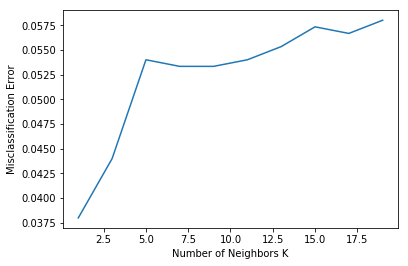

In [702]:
# Creating odd list of K for KNN

myList = list(range(1,20))

# subsetting just the odd ones

neighbors = list(filter(lambda x: x % 2 != 0, myList))


# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test_scaled, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)



import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Inference - Above graph shows that k= 1 is the optimal value with lowest misclassification error. 
So, we will go ahead with building the K nearest neighbour model with K = 1


In [703]:
# K Nearest Neighbour algorithm

NNH = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )

NNH.fit(X_train_scaled, y_train_scaled)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [704]:
# For every test data point, predict it's label based on 1 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = NNH.predict(X_test_scaled)
NNH.score(X_test_scaled, y_test_scaled)


0.962

In [705]:
# Print the accuracy score, confusion report, Classification report with precision, recall and f1 score, ROC AUC metrics

predProb = model.predict_proba(X_test_scaled.values)

print("**"*40)
print('The accuracy of the KNN is',metrics.accuracy_score(y_predict,y_test_scaled))
print("__"*40)
print("KNN -confusion_matrix :\n",confusion_matrix(y_test_scaled,y_predict))
print("__"*40)
print("\n KNN-classification_report :\n",classification_report(y_test_scaled,y_predict))
print("__"*40)
print('KNN-Recall Score',recall_score(y_test_scaled,y_predict))
print('KNN-ROC AUC :', roc_auc_score(y_test_scaled, predProb[:,1]))
print('KNN-Accuracy :',accuracy_score(y_test_scaled, y_predict))
accuracies_knn= cross_val_score(estimator = NNH, X = X_train_scaled, y = y_train_scaled, cv = 10) 
accuracies_knn_std=accuracies_knn.std()*100
print("Standard Deviation-KNN=",accuracies_knn_std)

print("**"*40)


********************************************************************************
The accuracy of the KNN is 0.962
________________________________________________________________________________
KNN -confusion_matrix :
 [[1336   15]
 [  42  107]]
________________________________________________________________________________

 KNN-classification_report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.88      0.72      0.79       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.85      0.88      1500
weighted avg       0.96      0.96      0.96      1500

________________________________________________________________________________
KNN-Recall Score 0.7181208053691275
KNN-ROC AUC : 0.7925623078107691
KNN-Accuracy : 0.962
Standard Deviation-KNN= 0.8663624805144763
********************************************************************************


Inference from KNN model using scalled data  :
    
    KNN model accuracy is 96.2% i.e Overall model is able to predict True positives and True Negatives with 96.2% accuracy.
It means model predicted customers with Personal Loan=1 as customers with Personal Loan product and 
Personal Loan =0 as customers without the personal product.

Recall: 
    
    Actually Model is actually working good for customers without the Personal Loan product i.e 99% of the times model 
predicted customers without the personal loan product as personal loan=0. 

Only for 72% of the cases model was able to predict customers with Personal loan product as personal i.e 107 customers 
out of 149. 

Precision :
    
    It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, 
how many are actually labeled true. Precision is 97% for the customers without the personal loan product i.e 1336 out of 
1378 customers.

Precision is only 88% for the customers with the personal loan product i.e Out of all the customers identified as 
customers with personal loan, Only 87% of the times customers labeled as cusomers with personal loan is acutally true
i.e 107 out of 122.

######## Logistic Regression Model with Scaled data ##########

In [707]:
# Logistic Regression Model 

model = LogisticRegression() 
classifier = LogisticRegression() 
model.fit(X_train_scaled, y_train_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1,
max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

# Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to 
# increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger
# regularization

y_predict_scaled = model.predict(X_test_scaled)

In [708]:
# Print the accuracy score, confusion report, Classification report with precision, recall and f1 score, ROC AUC metrics

predProb = model.predict_proba(X_test_scaled.values)

print("**"*40)
print('The accuracy of the Logistic is',metrics.accuracy_score(y_predict_scaled,y_test_scaled))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test_scaled,y_predict_scaled))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test_scaled,y_predict_scaled))
print("__"*40)
print('Recall Score',recall_score(y_test_scaled,y_predict_scaled))
print('ROC AUC :', roc_auc_score(y_test_scaled, predProb[:,1]))
print('Accuracy :',accuracy_score(y_test_scaled, y_predict_scaled))
accuracies_logistic= cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train_scaled, cv =10) 
accuracies_logistic_std=accuracies_logistic.std()*100
print("Standard Deviation - Accuracy:Logistic Regression =",accuracies_logistic_std)
print("**"*40)

********************************************************************************
The accuracy of the Logistic is 0.9486666666666667
________________________________________________________________________________
confusion_matrix :
 [[1336   15]
 [  62   87]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500

________________________________________________________________________________
Recall Score 0.5838926174496645
ROC AUC : 0.9534473594006925
Accuracy : 0.9486666666666667
Standard Deviation - Accuracy:Logistic Regression = 0.4137578160162636
***************************************************************